### Approach to the HD Problem

1. Load the dataset and libraries
2. Audit the data
3. EDA on the data
4. Prepare the data for the modeling
5. KNN - Standard KNN
6. KNN - Hyperparameters
7. Compare Standard KNN with KNN with Hyperparameters
8. SVM - Standard SVM
9. SVM - Hyperparameters
10. Compare all the below techniques
    1. Standard KNN
    2. Hyperparameter KNN
    3. Standard SVM
    4. Hyperparameters SVM

# Load the Dataset and Libraries

Load the librares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load the dataset

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

# Exploratory Data Analysis

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

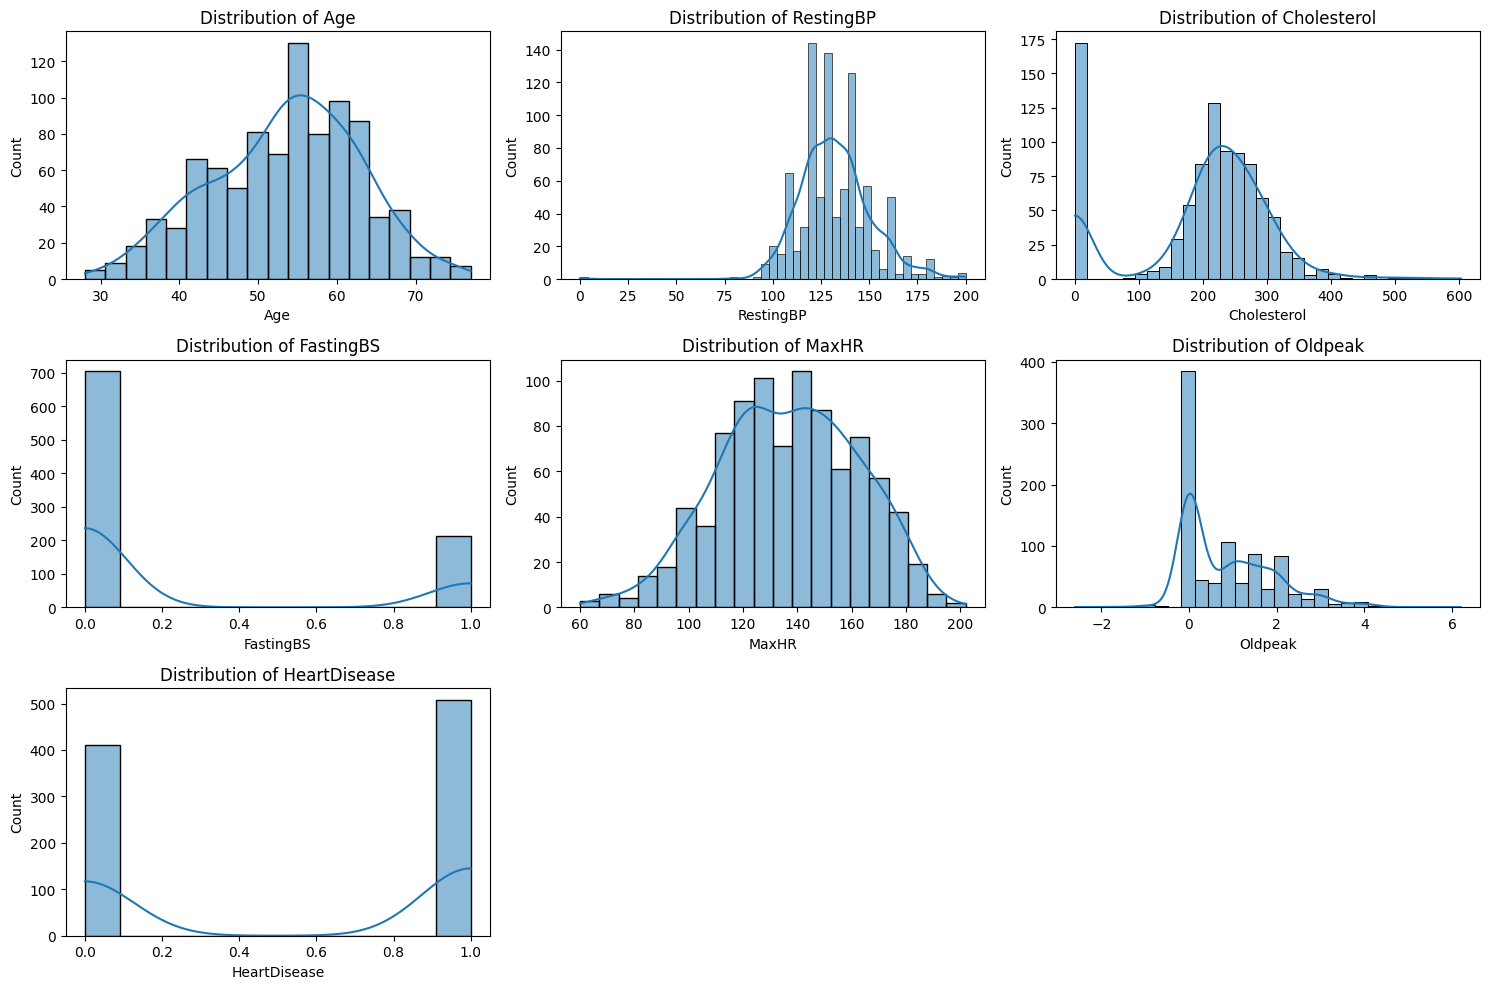

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Check for outliers

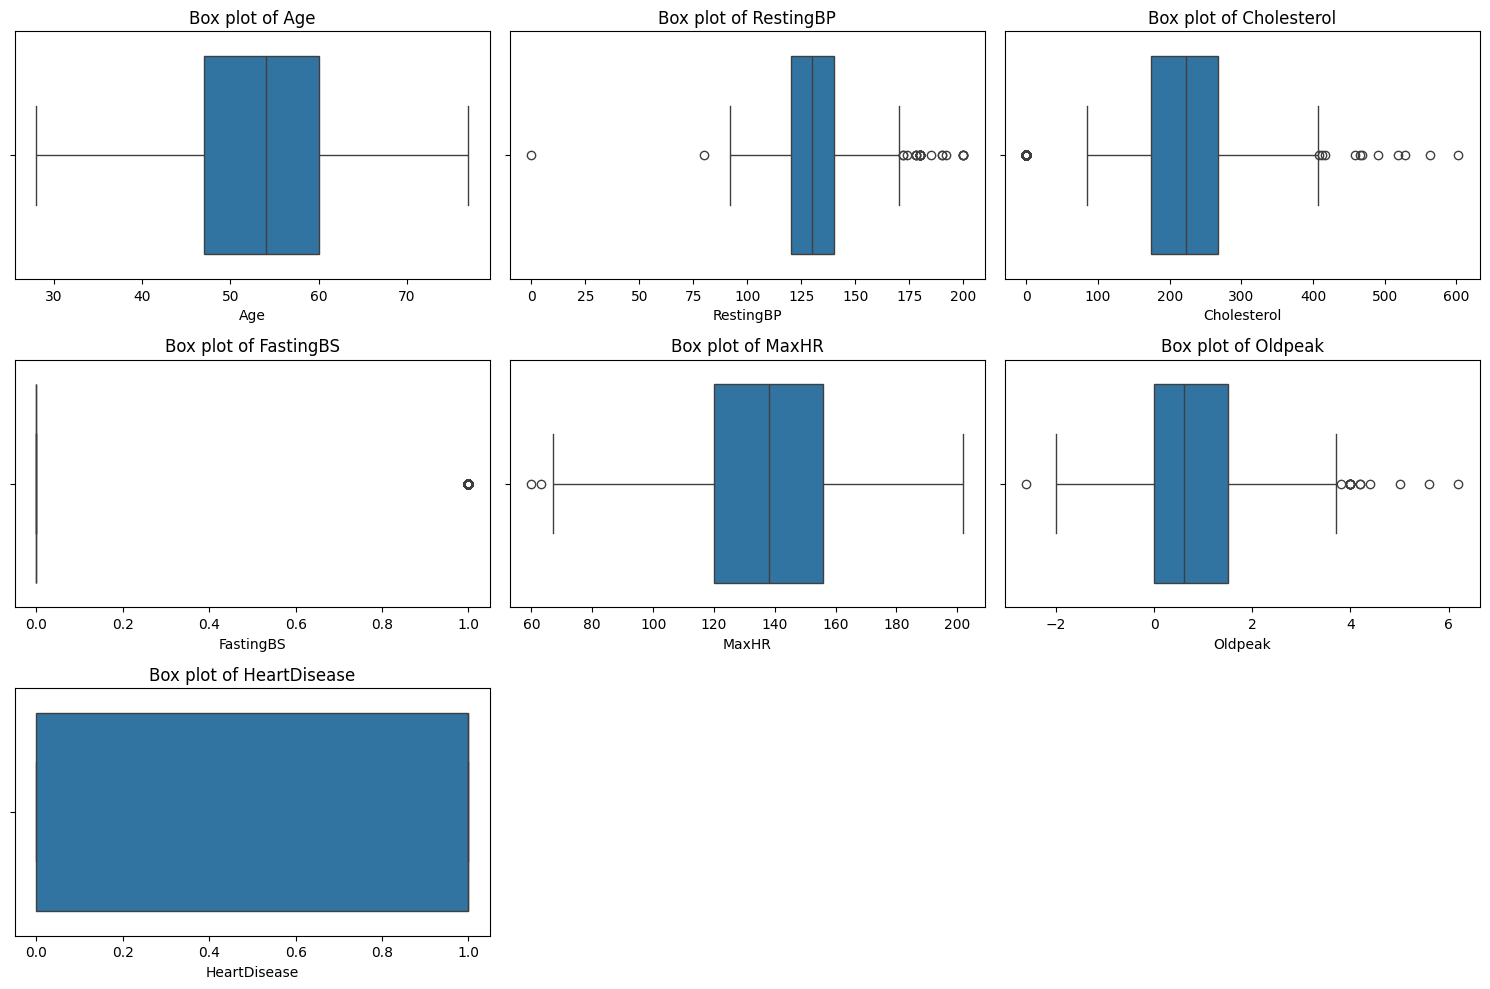

In [8]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

Categorical Columns EDA

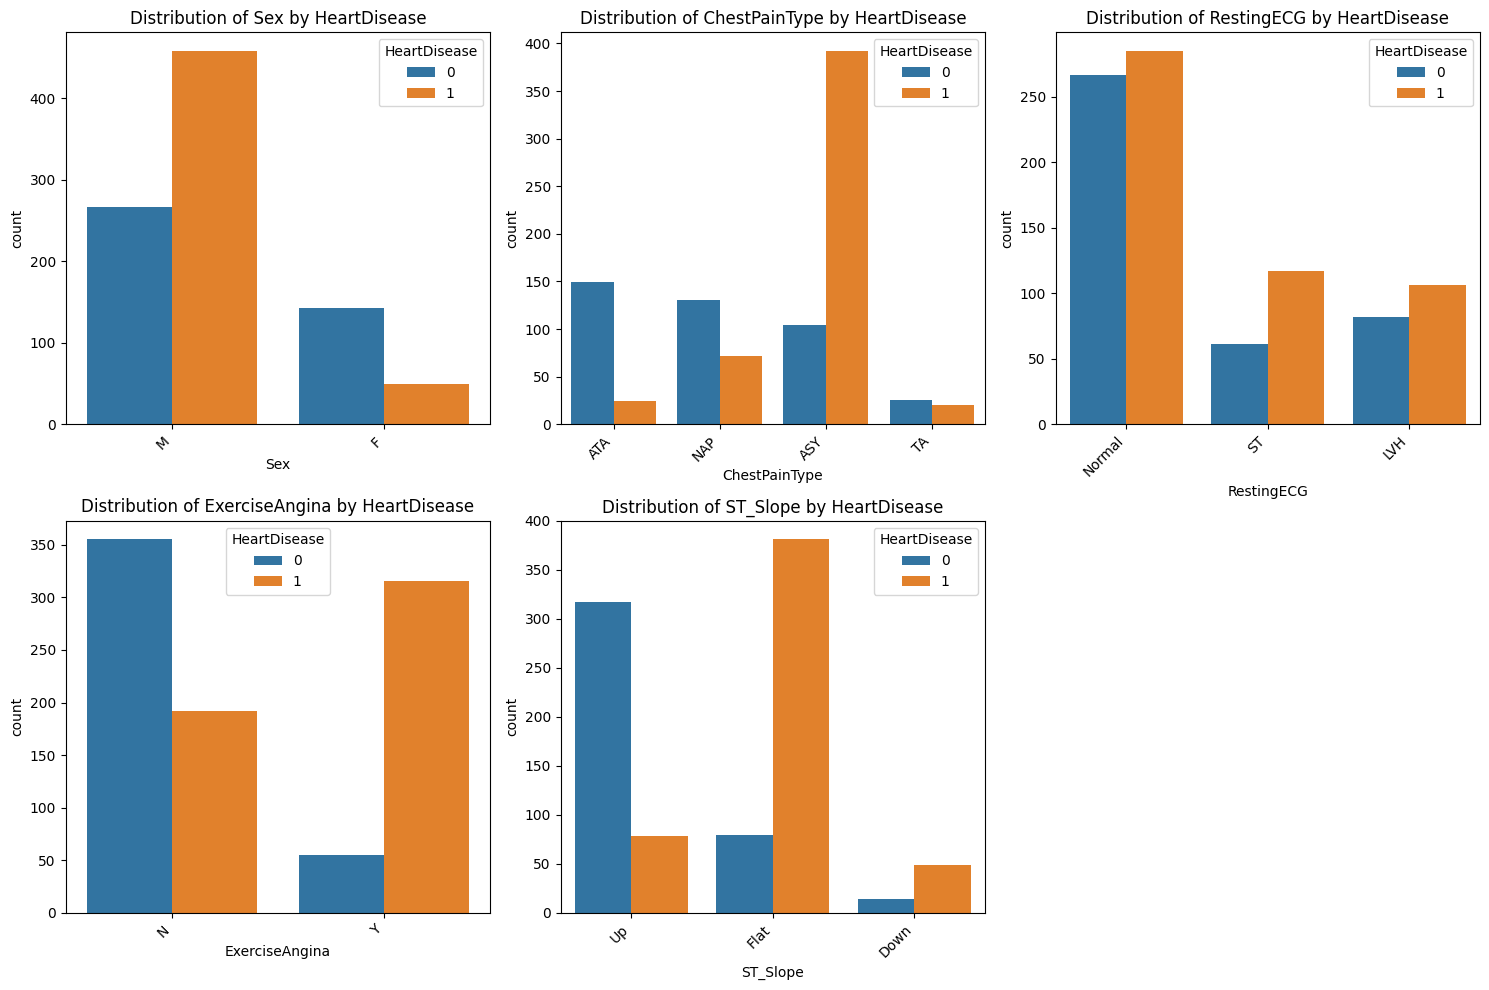

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f'Distribution of {col} by HeartDisease')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Data is got outliers so hence this non linear data
2. Distribution is not normal so linear models can be avoided
3. Categorical variables like sex chest pain type look like clear indicators in predicting a heart disease

# Prepare the data for Modeling

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns


In [12]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical_data = one_hot_encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_df = df[numerical_cols].reset_index(drop=True)

df_encoded = pd.concat([numerical_df, encoded_categorical_df], axis=1)
display(df_encoded.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
x = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

Train and Test Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 20)
(184, 20)
(734,)
(184,)


# KNN

Standard KNN

In [16]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
y_preds_knn = knn.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_preds_knn)
precision_knn = precision_score(y_test, y_preds_knn)
recall_knn = recall_score(y_test, y_preds_knn)
f1_knn = f1_score(y_test, y_preds_knn)

# Print the evaluation results
print(f"KNN Model Performance (Default Hyperparameters):")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")

KNN Model Performance (Default Hyperparameters):
Accuracy: 0.7065
Precision: 0.7290
Recall: 0.7573
F1-Score: 0.7429


In [20]:
confusion_matrix(y_test, y_preds_knn)

array([[52, 29],
       [25, 78]])

KNN - Hyperparameters

In [21]:
knn_hp = KNeighborsClassifier(metric = 'manhattan', n_neighbors=9, weights='distance')
knn_hp.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [22]:
y_preds_hp_knn = knn_hp.predict(x_test)

In [23]:
# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_preds_hp_knn)
precision_knn = precision_score(y_test, y_preds_hp_knn)
recall_knn = recall_score(y_test, y_preds_hp_knn)
f1_knn = f1_score(y_test, y_preds_hp_knn)

# Print the evaluation results
print(f"KNN Model Performance (Hyperparameters):")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")

KNN Model Performance (Hyperparameters):
Accuracy: 0.7826
Precision: 0.7890
Recall: 0.8350
F1-Score: 0.8113


In [24]:
print(confusion_matrix(y_test, y_preds_hp_knn))

[[58 23]
 [17 86]]


# SVM

SVM with Default

In [25]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [26]:
y_hat_svc = svc.predict(x_test)

In [27]:
# Evaluate the model's performance
accuracy_svc = accuracy_score(y_test, y_hat_svc)
precision_svc = precision_score(y_test, y_hat_svc)
recall_svc = recall_score(y_test, y_hat_svc)
f1_svc = f1_score(y_test, y_hat_svc)

# Print the evaluation results
print(f"SVC Model Performance (Default Hyperparameters):")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1-Score: {f1_svc:.4f}")

SVC Model Performance (Default Hyperparameters):
Accuracy: 0.6902
Precision: 0.7170
Recall: 0.7379
F1-Score: 0.7273


In [28]:
print(confusion_matrix(y_test, y_hat_svc))

[[51 30]
 [27 76]]


SVM with HyperParameters

In [29]:
svc_hp = SVC(C = 1, gamma = 'auto', kernel = 'rbf')
svc_hp.fit(x_train, y_train)

SVC(C=1, gamma='auto')

In [30]:
y_test_preds_svc_hp = svc_hp.predict(x_test)

In [31]:
# Evaluate the model's performance
accuracy_svc = accuracy_score(y_test, y_test_preds_svc_hp)
precision_svc = precision_score(y_test, y_test_preds_svc_hp)
recall_svc = recall_score(y_test, y_test_preds_svc_hp)
f1_svc = f1_score(y_test, y_test_preds_svc_hp)

# Print the evaluation results
print(f"SVC Model Performance (Default Hyperparameters):")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1-Score: {f1_svc:.4f}")

SVC Model Performance (Default Hyperparameters):
Accuracy: 0.5761
Precision: 0.5731
Recall: 0.9515
F1-Score: 0.7153
